# Overview Of The Countdown Numbers Game

****

<h5>What Is The Countdown Numbers Game?</h5>

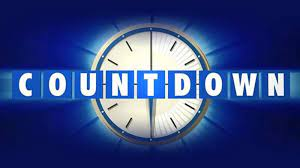

The Countdown Numbers Game is a popular arithmetical puzzle which has been played as a two-player game on French
and British television weekly for decades.

The contestant decides how many large numbers are to be used, from none to all four, after which the six tiles are randomly drawn and placed on the board. A random three-digit target number is then generated. The contestants have 30 seconds to work out a sequence of calculations with the numbers whose final result is as close to the target number as possible. They may use only the four basic operations of addition, subtraction, multiplication and division, and do not have to use all six numbers and a number may not be used more times than it appears on the board.



<br>

<h5>An Example of the Countdown Numbers Game</h5>

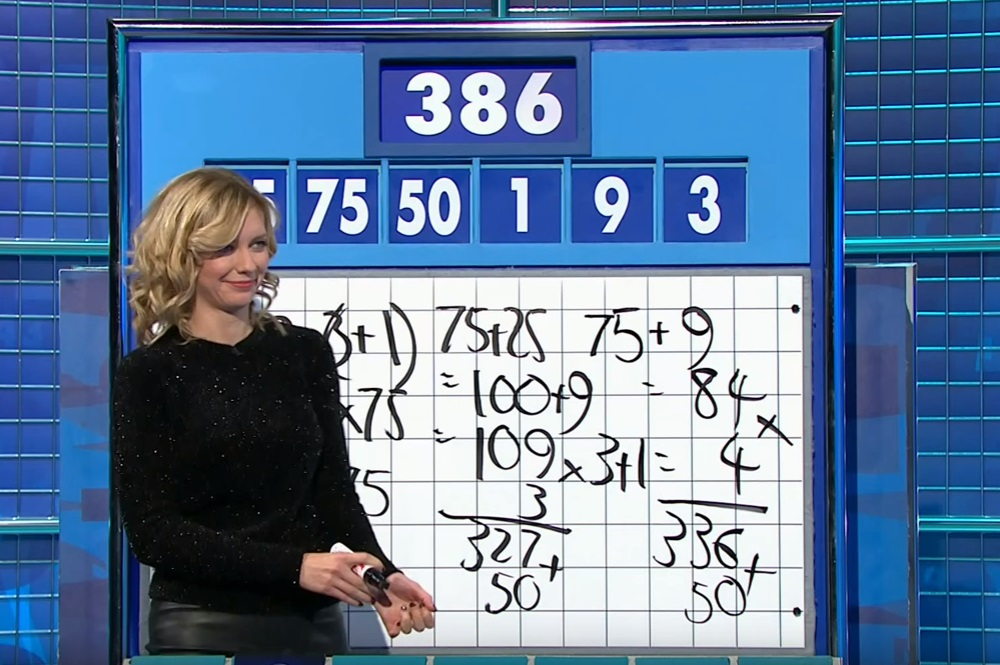

There are six numbers are generated at random:

| 100 | 9 | 2 | 75 | 10 | 5 |

The target is then generated and is:

843

The contestant answers 845 (2 away), the calculation proceeded as follows:

- 10 + 9 = 19
- 75 x 2 = 150
- 150 + 19 = 169
- 169 x 5 = 845

<br>

# Discussing The Complexity Of The Countdown Numbers Game

****

<h5>The Complexity of the Countdown Numbers Game</h5>

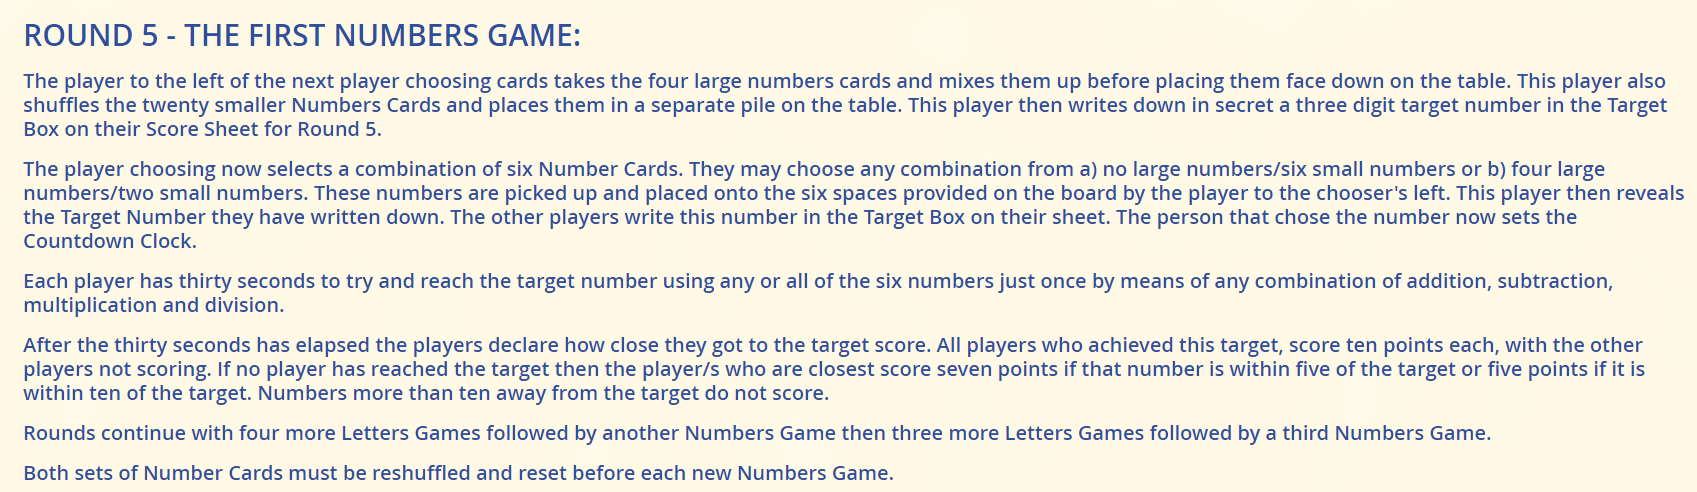

The Countdown Numbers Game is a very complex game to follow and understand for newcomers as there are many rules and guidelines to follow in order to pass the game, these rules include:

- Six numbers are selected at random.
- These numbers are generated in two groups, small numbers and large numbers.
- Typically, the large numbers are between (25, 50, 75, 100)
- There are twenty numbers in the small set, two each of the numbers 1-10
- A random three-digit target number is also generated by the computer
- The user is then expected to get as close as possible to the chosen target by using just the four basic arithmetic operators (+, -, ×, ÷)
- But not all the digits need to be used.
- Concatenation of the digits is not allowed, for example you can't use 3 and 4 to make 34
- At no point in the process can the current running total become negative or involve a fraction
- Each number can only be used once in the calculation

These rules that the user is required to follow is the reason for the complexity for the algorithm as it forces to user to currate particular solutions.

<br>

# Solving The Countdown Numbers Game

****

<h5>Imports</h5>

Python Random module is an in-built module of Python which is used to generate random numbers. These are pseudo-random numbers means these are not truly random. This module can be used to perform random actions such as generating random numbers, print random a value for a list or string, etc.

<br>

In [1]:
# Random number generation
import random

<h5>Lambda Expressions</h5>

A lambda function is just like any normal python function, except that it has no name when defining it, and it is contained in one line of code. Here we create 4 labmda functions that will take in a number of parameters and combine the function to return a value from the expression.

In [2]:
# Setting our 4 operators
plus = lambda x,y: x+y
minus = lambda x,y: x-y
multiply = lambda x,y: x*y
divide = lambda x,y: x/y if x % y == 0 else 0/0

symbols = [ (plus, '+'),
               (minus, '-'),
               (multiply, '*'),
               (divide, '/')]

<h5>Generators</h5>

A generator is a function that returns an object (iterator) which we can iterate over (one value at a time). Here we will generate a set of numbers from two lists of integers (small numbers and large numbers).

<br>

In [3]:
# The large numbers
def large_numbers():
    # Two large numbers from this list are generated at random
    return [25, 50, 75, 100][random.randint(0,2)]

In [4]:
large_numbers

<function __main__.large_numbers()>

In [5]:
# The small numbers
def small_numbers():
    # 4 small numbers at random between 1 - 10
    return random.randint(1,10)

In [6]:
small_numbers

<function __main__.small_numbers()>

<h5>Reverse Polish Notation</h5>

Reverse Polish notation (RPN) is a method for representing expressions in which the operator symbol is placed after the arguments being operated on.

In [7]:
# Evaluating the RPN (Reverse Polish Notation) expression.
def assess_method(heap):
    try:
        # The main initializers
        overall = 0
        operation = plus
        
        # Loop through rpn an item at a time
        for i in heap:
            # Check if it's a number
            if type(i) is int:
                overall = operation(overall, i)
            else:
                operation = i[0]
        
        # Returning the total
        return overall
    except:
        return 0

In [8]:
# Checking whether the varibales are an integer or not
def reprHeap(heap):
    reps = [ str(i) if type(i) is int else i[1] for i in heap ]
    return ' '.join(reps)

In [9]:
# Solving the countdown numbers game
def solution(target, digits):
    
    # Give all 2-partitions of a list, where each sublist has one element.
    def iterative(heap, numbers):
        # Loop through all the ways to partition L into two non-empty sublists
        for r in range(len(numbers)):
            # Append to the stack.
            heap.append( numbers[r] )
            extra = numbers[:r] + numbers[r+1:]

            if assess_method(heap) == target:
                print(reprHeap(heap))
            
            # Push operator applied to stack elements
            if len(extra) > 0:
                for s in symbols:
                    heap.append(s)
                    heap = iterative(heap, extra)
                    heap = heap[:-1]
            
            # Pop from stack
            heap = heap[:-1]

        # Return only one item on the stack
        return heap

    iterative([], digits)

<h5>Example</h5>

Here we will look at a quick example where will generate our 6 numbers as well as out target numbers, once they have been generated we will then see all the possible solutions that can be applied.

In [10]:
# The target number is generated between 100 - 1000
target = random.randint(100,1000)

In [11]:
target

160

In [12]:
# The 6 numbers (both large and small) are generated at random
digits = [ large_numbers() ] + [ small_numbers() for i in range(5) ]

In [13]:
digits

[50, 10, 5, 5, 2, 4]

In [14]:
# The numbers and target are generated
# The solutions are also printed
print("The Countdown Numbers Game")
print("=======================================================================================================================")
print("The Target Number Is: {0}\nUse The Numbers: {1}".format(target, digits))
print("=======================================================================================================================")
print("Solutions:")
print("")
solution(target, digits)
print("=======================================================================================================================")

The Countdown Numbers Game
The Target Number Is: 160
Use The Numbers: [50, 10, 5, 5, 2, 4]
Solutions:

50 + 10 + 4 * 5 / 2
50 + 10 + 4 * 5 / 2
50 + 10 + 4 / 2 * 5
50 + 10 + 4 / 2 * 5
50 + 10 * 5 / 4 + 5 * 2
50 + 10 * 5 / 4 + 5 * 2
50 + 10 / 5 + 4 * 5 * 2
50 + 10 / 5 + 4 * 2 * 5
50 + 10 / 5 + 4 * 5 * 2
50 + 10 / 5 + 4 * 2 * 5
50 + 10 / 2 + 5 + 5 * 4
50 + 10 / 2 + 5 + 5 * 4
50 + 10 / 4 * 5 + 5 * 2
50 + 10 / 4 * 5 + 5 * 2
50 + 5 + 5 / 2 + 10 * 4
50 + 5 - 10 - 5 * 4
50 + 5 - 5 - 10 * 4
50 + 5 + 5 / 2 + 10 * 4
50 + 5 - 10 - 5 * 4
50 + 5 - 5 - 10 * 4
50 + 4 + 10 * 5 / 2
50 + 4 + 10 * 5 / 2
50 + 4 + 10 / 2 * 5
50 + 4 + 10 / 2 * 5
50 + 4 / 2 + 10 - 5 * 5
50 + 4 / 2 + 10 - 5 * 5
50 + 4 / 2 + 5 * 5
50 + 4 / 2 + 5 * 5
50 + 4 / 2 - 5 + 10 * 5
50 + 4 / 2 - 5 + 10 * 5
50 - 10 + 5 - 5 * 4
50 - 10 + 5 - 5 * 4
50 - 10 - 5 + 5 * 4
50 - 10 - 5 + 5 * 4
50 - 10 * 5 * 4 / 5
50 - 10 * 5 / 5 * 4
50 - 10 * 5 * 4 / 5
50 - 10 * 5 / 5 * 4
50 - 10 * 4
50 - 10 * 4 + 5 - 5
50 - 10 * 4 + 5 - 5
50 - 10 * 4 - 5 + 5
50 

10 * 2 - 4 * 50 / 5
10 * 2 - 4 * 50 / 5
10 * 2 * 50 * 4 / 5 / 5
10 * 2 * 50 * 4 / 5 / 5
10 * 2 * 50 / 5 * 4 / 5
10 * 2 * 50 / 5 / 5 * 4
10 * 2 * 50 / 5 * 4 / 5
10 * 2 * 50 / 5 / 5 * 4
10 * 2 * 4 * 50 / 5 / 5
10 * 2 * 4 * 50 / 5 / 5
10 * 2 * 4 / 5 * 50 / 5
10 * 2 * 4 / 5 * 50 / 5
10 * 2 / 5 * 50 * 4 / 5
10 * 2 / 5 * 50 / 5 * 4
10 * 2 / 5 * 4 * 50 / 5
10 * 2 / 5 * 50 * 4 / 5
10 * 2 / 5 * 50 / 5 * 4
10 * 2 / 5 * 4 * 50 / 5
10 * 4 + 50 - 5 - 5 * 2
10 * 4 + 50 - 5 - 5 * 2
10 * 4 + 2 * 5 - 50
10 * 4 + 2 * 5 - 50
10 * 4 - 5 + 50 - 5 * 2
10 * 4 - 5 - 5 + 50 * 2
10 * 4 - 5 + 50 - 5 * 2
10 * 4 - 5 - 5 + 50 * 2
10 * 4 * 50 * 2 / 5 / 5
10 * 4 * 50 * 2 / 5 / 5
10 * 4 * 50 / 5 * 2 / 5
10 * 4 * 50 / 5 / 5 * 2
10 * 4 * 50 / 5 * 2 / 5
10 * 4 * 50 / 5 / 5 * 2
10 * 4 * 2 * 50 / 5 / 5
10 * 4 * 2 * 50 / 5 / 5
10 * 4 * 2 / 5 * 50 / 5
10 * 4 * 2 / 5 * 50 / 5
10 * 4 / 5 * 50 * 2 / 5
10 * 4 / 5 * 50 / 5 * 2
10 * 4 / 5 * 2 * 50 / 5
10 * 4 / 5 * 50 * 2 / 5
10 * 4 / 5 * 50 / 5 * 2
10 * 4 / 5 * 2 * 50 / 5
10 / 5 +

2 * 4 * 50 / 5 / 5 * 10
2 * 4 * 50 / 5 * 10 / 5
2 * 4 * 50 / 5 / 5 * 10
2 * 4 * 10 * 50 / 5 / 5
2 * 4 * 10 * 50 / 5 / 5
2 * 4 * 10 / 5 * 50 / 5
2 * 4 * 10 / 5 * 50 / 5
2 * 4 * 5 * 5 + 10 - 50
2 * 4 * 5 * 5 - 50 + 10
2 * 4 * 5 * 5 + 10 - 50
2 * 4 * 5 * 5 - 50 + 10
4 + 50 + 10 * 5 / 2
4 + 50 + 10 * 5 / 2
4 + 50 + 10 / 2 * 5
4 + 50 + 10 / 2 * 5
4 + 50 / 2 + 10 - 5 * 5
4 + 50 / 2 + 10 - 5 * 5
4 + 50 / 2 + 5 * 5
4 + 50 / 2 + 5 * 5
4 + 50 / 2 - 5 + 10 * 5
4 + 50 / 2 - 5 + 10 * 5
4 + 10 + 50 * 5 / 2
4 + 10 + 50 * 5 / 2
4 + 10 + 50 / 2 * 5
4 + 10 + 50 / 2 * 5
4 + 10 + 2 * 50 / 5
4 + 10 + 2 * 50 / 5
4 + 5 + 5 + 2 * 10
4 + 5 + 2 + 5 * 10
4 + 5 + 2 * 10 + 50
4 + 5 * 50 / 5 - 10 * 2
4 + 5 * 5 + 10 * 2 + 50
4 + 5 + 5 + 2 * 10
4 + 5 + 2 + 5 * 10
4 + 5 + 2 * 10 + 50
4 + 5 * 50 / 5 - 10 * 2
4 + 5 * 5 + 10 * 2 + 50
4 + 2 + 10 * 50 / 5
4 + 2 + 10 * 50 / 5
4 + 2 + 5 + 5 * 10
4 + 2 + 5 * 10 + 50
4 + 2 + 5 + 5 * 10
4 + 2 + 5 * 10 + 50
4 + 2 * 5 + 50 * 10 / 5
4 + 2 * 5 + 50 / 5 * 10
4 + 2 * 5 * 5 + 10
4 + 2

<br>

# Explaining Functional Aspects Of Code

****

<h5>Built-In Functions</h5>

Python has a set of built-in functions. During the development of this notebook, I utilized two of python's built-in functions, mainly the functions <i>len()</i>, <i>type()</i> and <i>range()</i>.

- <i>len()</i>: Returns the length of an object
- <i>len()</i>: Returns the type of an object
- <i>range()</i>: Returns a sequence of numbers, starting from 0 and increments by 1 (by default)

While also developing the solution for this algorithm, I looked at the use of various other python built-in functions including <i>int()</i>, <i>eval()</i>, <i>str()</i>, <i>list()</i> and <i>zip()</i> while working on different approaches to this problem.

- <i>int()</i>: Returns an integer number
- <i>eval()</i>: Evaluates and executes an expression
- <i>str()</i>: Returns a string object
- <i>list()</i>: Returns a list
- <i>zip()</i>: Returns an iterator, from two or more iterators

Eventually I settled on the solution you see above in which we use both the built-in functions <i>len()</i>, <i>type()</i> and <i>range()</i>. We used both functions <i>type()</i> and <i>range()</i> multiple times. One of the uses of the <i>type()</i> function in our solution, we used to loop through the items in the RPN (Reverse Polish Notation) and confirm that said item is a number:

```python
for i in heap:
            if type(i) is int:
                overall = operation(overall, i)
            else:
                operation = i[0]
```

On the examples of the use of <i>range()</i> in our solution, was when we utilized the function in generating the 6 numbers at random that were to be used in the final solution:

```python
digits = [ large_numbers() ] + [ small_numbers() for i in range(5) ]
```

Finally, we used the <i>len()</i> function to push that we created manually to the stack elements:

```python
if len(extra) > 0:
                for s in symbols:
                    heap.append(s)
                    heap = iterative(heap, extra)
                    heap = heap[:-1]
```

<h5>Generators</h5>

Generators in python are functions with the purpose of declaring functions acting as an iterator, this allows for the creation of more efficient iterators, an iterator being an object that can be iterated upon, used to retrieve data from a container for it to act as an iterable object, examples of this can be a list, tuple, string or set.

The use of generators was important for this solution as we needed it to generate 6 numbers from two set lists of integers we created, the lists being divied into small numbers (1-10) and large numbers (25, 50, 75, 100):

```python
def large_numbers():
    return [25, 50, 75, 100][random.randint(0,2)]

def small_numbers():
    return random.randint(1,10)
```

The numbers are then extracted from each list to form it's own list of integers of nubmers generated at random.

<h5>Small Functions and The Lambda Expression</h5>

While composing functional programming, the utilization of small functions are important as they are used as a basis or acts as a integration of elements.

There are instances in our solution of using python built-in functions as an alternative when defining a new function was unnecessary, for example:

```python
digits = [ large_numbers() ] + [ small_numbers() for i in range(5) ]
```

If the built-in function does not exist, then small functions can be written, one exmaple of this is the use of lambda expressions, which takes in a number of parameters and merge them to create a function to return a value from the expression.

```python
plus = lambda x,y: x+y
minus = lambda x,y: x-y
multiply = lambda x,y: x*y
divide = lambda x,y: x/y if x % y == 0 else 0/0
```

A different approach to this is a typical function involving the use of def statements to define a function:

```python
def reprHeap(heap):
    reps = [ str(i) if type(i) is int else i[1] for i in heap ]
    return ' '.join(reps)
```

***
## End